#### Regression

In [2]:
pip install pycaret


  Using cached pycaret-3.3.2-py3-none-any.whl.metadata (17 kB)
  Using cached ipywidgets-8.1.6-py3-none-any.whl.metadata (2.4 kB)
  Using cached pandas-2.1.4-cp310-cp310-win_amd64.whl.metadata (18 kB)
  Using cached scikit_learn-1.6.1-cp310-cp310-win_amd64.whl.metadata (15 kB)
  Using cached pyod-2.0.4-py3-none-any.whl
  Using cached imbalanced_learn-0.13.0-py3-none-any.whl.metadata (8.8 kB)
  Using cached category_encoders-2.8.1-py3-none-any.whl.metadata (7.9 kB)
  Using cached lightgbm-4.6.0-py3-none-win_amd64.whl.metadata (17 kB)
  Using cached numba-0.61.2-cp310-cp310-win_amd64.whl.metadata (2.9 kB)
  Using cached importlib_metadata-8.6.1-py3-none-any.whl.metadata (4.7 kB)
  Using cached matplotlib-3.7.5-cp310-cp310-win_amd64.whl.metadata (5.8 kB)
  Using cached scikit_plot-0.3.7-py3-none-any.whl.metadata (7.1 kB)
  Using cached yellowbrick-1.5-py3-none-any.whl.metadata (7.7 kB)
  Using cached plotly_resampler-0.10.0-py3-none-any.whl.metadata (13 kB)
  Using cached statsmodels-0.1

In [6]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [3]:
import sys 
sys.version

'3.10.16 | packaged by Anaconda, Inc. | (main, Dec 11 2024, 16:19:12) [MSC v.1929 64 bit (AMD64)]'

In [2]:
import pandas as pd
import seaborn as sns
from pycaret.regression import *
diamonds = sns.load_dataset('diamonds')

data_reg = pd.get_dummies(diamonds.sample(frac=0.1, random_state=42), 
               columns=['cut', 'color', 'clarity'])

reg_exp = setup(data=data_reg, target='price', session_id=123,
               normalize=True, transformation=True,
               remove_outliers=True, polynomial_features=True)
best_reg = compare_models()

,Description,Value
0,Session id,123
1,Target,price
2,Target type,Regression
3,Original data shape,"(5394, 27)"
4,Transformed data shape,"(5205, 378)"
5,Transformed train set shape,"(3586, 378)"
6,Transformed test set shape,"(1619, 378)"
7,Numeric features,6
8,Preprocess,True
9,Imputation type,simple


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,433.2984,698249.6922,829.9197,0.9593,0.1648,0.1302,5.6030
lightgbm,Light Gradient Boosting Machine,402.2489,702022.5655,834.5522,0.9588,0.1333,0.1020,2.5080
et,Extra Trees Regressor,391.3851,708768.4724,837.0954,0.9584,0.1283,0.0949,9.2840
rf,Random Forest Regressor,430.4842,781951.2554,882.4931,0.9537,0.1394,0.1065,9.8990
dt,Decision Tree Regressor,567.5019,1393916.1461,1170.3133,0.9182,0.1855,0.1378,1.1710
ridge,Ridge Regression,922.0621,2366769.8198,1535.1674,0.8604,0.5820,0.3942,1.4270
lasso,Lasso Regression,1018.1183,2777782.1494,1662.9259,0.8374,0.6019,0.4361,3.2570
ada,AdaBoost Regressor,1480.8809,3112824.6812,1744.9256,0.8136,0.7445,1.0497,5.0130
omp,Orthogonal Matching Pursuit,1111.8667,3294565.3687,1811.7015,0.8067,0.7002,0.4860,1.5980
huber,Huber Regressor,999.2952,4006685.2039,1995.4219,0.7662,0.4763,0.3129,2.7780


#### Classification

In [9]:
from pycaret.classification import *  #

titanic = sns.load_dataset('titanic').dropna()

clf_exp = setup(data=titanic, target='survived', session_id=123,
               normalize=True,
               remove_multicollinearity=True)
best_clf = compare_models()

,Description,Value
0,Session id,123
1,Target,survived
2,Target type,Binary
3,Original data shape,"(182, 15)"
4,Transformed data shape,"(182, 24)"
5,Transformed train set shape,"(127, 24)"
6,Transformed test set shape,"(55, 24)"
7,Numeric features,5
8,Categorical features,7
9,Preprocess,True


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.9560
nb,Naive Bayes,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.1180
dt,Decision Tree Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.1210
ridge,Ridge Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.1330
ada,Ada Boost Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.1600
gbc,Gradient Boosting Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.1540
lightgbm,Light Gradient Boosting Machine,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.1990
svm,SVM - Linear Kernel,0.9923,1.0000,1.0000,0.9900,0.9947,0.9806,0.9822,0.1280
rf,Random Forest Classifier,0.9923,1.0000,1.0000,0.9889,0.9941,0.9831,0.9843,0.2690
qda,Quadratic Discriminant Analysis,0.9923,1.0000,1.0000,0.9889,0.9941,0.9831,0.9843,0.1440


#### Clustering

In [4]:
from pycaret.clustering import *

df = sns.load_dataset('penguins').dropna()
clus = setup(data=df.drop(columns='species'), session_id=123, verbose=False)
kmeans = create_model('kmeans')
clustered = assign_model(kmeans)


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5529,1370.2723,0.5174,0,0,0


### Viz

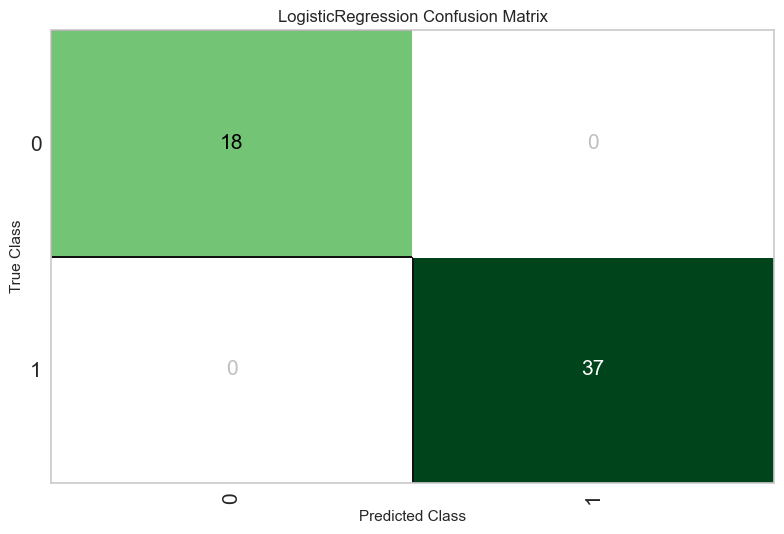

In [10]:
import matplotlib.pyplot as plt
plot_model(best_clf, plot='confusion_matrix')

